In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Valerie_Womack/publication/289670291/figure/fig4/AS:666603662348288@1535942106313/Dallas-Police-Department-patrol-division-boundaries-2009_W640.jpg")
Image(url= "https://res.cloudinary.com/culturemap-com/image/upload/ar_4:3,c_fill,g_faces:center,w_1200/v1491756896/photos/105147_original.jpg")

In [2]:
Image(url= "https://www.researchgate.net/profile/Valerie_Womack/publication/289670291/figure/fig4/AS:666603662348288@1535942106313/Dallas-Police-Department-patrol-division-boundaries-2009_W640.jpg")

# Problem:

# Target Audience:

# Data and Data Sources:

# Methodology:

# Results:

# Discussion:

# Conclusion:

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # To convert an address into latitude and longitude values

from bs4 import BeautifulSoup # To parse HTML and XML documents
from urllib.request import urlopen
import requests # To handle requests
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

import xml

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # Import K-Means from clustering 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # To generate Leaflet maps

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


bran

In [2]:
import pandas as pd
dallas_crime = pd.read_json ('https://www.dallasopendata.com/resource/qv6i-rri7.json')
dallas_crime.head()

,:@computed_region_2f7u_b5gs,:@computed_region_sjyw_rtbm,apt,assoffbadge,beat,callcleared,calldispatched,callorgdate,callreceived,cfs_number,...,victimcond,victiminjurydesc,victimtype,watch,weaponused,x_coordinate,y_cordinate,year1,year2,zip_code
0,3.0,10.0,NaN,T270,651,2019-11-24T22:13:46.000,2019-11-24T20:00:24.000,2019-11-24T19:24:10.000,2019-11-24T19:24:09.000,19-2221102,...,NaN,NaN,Individual,3,NaN,2.490957e+06,7.013986e+06,2019,2019,75230
1,NaN,NaN,NaN,8283,151,2019-01-17T18:22:46.000,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,19-0099145,...,NaN,NaN,Government,2,NaN,NaN,NaN,2019,2019,75215
2,3.0,10.0,NaN,9437,644,2017-11-28T01:05:58.000,2017-11-27T23:43:14.000,2017-11-27T23:00:16.000,2017-11-27T23:00:15.000,17-2248386,...,NaN,NaN,NaN,1,Other,2.505473e+06,7.028370e+06,2017,2017,75243
3,3.0,2.0,NaN,7519,146,2019-11-21T22:17:01.000,2019-11-21T16:50:21.000,2019-11-21T16:48:24.000,2019-11-21T16:48:24.000,19-2199634,...,NaN,NaN,Individual,1,NaN,2.496885e+06,6.982699e+06,2019,2019,75206
4,3.0,12.0,103,NaN,144,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Individual,1,NaN,2.504286e+06,6.983357e+06,2018,2019,75214


### Let's rename the columns of interest, while still keeping the original dataframe

In [3]:
dallas_crime.rename(columns = {'servyr':'Year of Incident', 'watch':'Watch', 'offincident':'Type of Incident', 'premise':'Type Location', 'incident_address':'Incident Address', 'division':'Division', 'taag':'Target Area Action Grids', 'date1':'Date1 of Occurence', 'time1':'Time1 of Occurence', 'reporteddate':'Date of Report', 'callorgdate':'Call Received Date Time', 'victimtype':'Victim Type', 'comprace':'Victim Race', 'compsex':'Victim Gender', 'compageatoffensetime':'Victim Age at Offense', 'comphzipcode':'Victim Zipcode', 'status':'Offense Status', 'mo':'Modus Operandi (MO)', 'drug':'Drug Related Incident', 'x_coordinate':'X Coordinate', 'y_cordinate':'Y Coordinate', 'zip_code':'Zip Code', 'incidentnum':'Incident Number w/year', 'signal':'Call (911) Problem'}, inplace = True)

dallas_crime.head()

,:@computed_region_2f7u_b5gs,:@computed_region_sjyw_rtbm,apt,assoffbadge,beat,callcleared,calldispatched,Call Received Date Time,callreceived,cfs_number,...,victimcond,victiminjurydesc,Victim Type,Watch,weaponused,X Coordinate,Y Coordinate,year1,year2,Zip Code
0,3.0,10.0,NaN,T270,651,2019-11-24T22:13:46.000,2019-11-24T20:00:24.000,2019-11-24T19:24:10.000,2019-11-24T19:24:09.000,19-2221102,...,NaN,NaN,Individual,3,NaN,2.490957e+06,7.013986e+06,2019,2019,75230
1,NaN,NaN,NaN,8283,151,2019-01-17T18:22:46.000,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,19-0099145,...,NaN,NaN,Government,2,NaN,NaN,NaN,2019,2019,75215
2,3.0,10.0,NaN,9437,644,2017-11-28T01:05:58.000,2017-11-27T23:43:14.000,2017-11-27T23:00:16.000,2017-11-27T23:00:15.000,17-2248386,...,NaN,NaN,NaN,1,Other,2.505473e+06,7.028370e+06,2017,2017,75243
3,3.0,2.0,NaN,7519,146,2019-11-21T22:17:01.000,2019-11-21T16:50:21.000,2019-11-21T16:48:24.000,2019-11-21T16:48:24.000,19-2199634,...,NaN,NaN,Individual,1,NaN,2.496885e+06,6.982699e+06,2019,2019,75206
4,3.0,12.0,103,NaN,144,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Individual,1,NaN,2.504286e+06,6.983357e+06,2018,2019,75214


### Let's start analyzing the numeric columns in the dataframe

In [4]:
dallas_crime.describe()

,:@computed_region_2f7u_b5gs,:@computed_region_sjyw_rtbm,beat,cjis,compage,Victim Age at Offense,compbphone,Victim Zipcode,date1dayofyear,date2dayofyear,...,ro2badge,sector,Year of Incident,ucrcode,Watch,X Coordinate,Y Coordinate,year1,year2,Zip Code
count,943.000000,941.000000,1000.000000,1.000000e+03,611.00000,558.000000,1.000000e+01,889.000000,1000.000000,1000.000000,...,298.000000,1000.000000,1000.000000,177.000000,1000.00000,9.990000e+02,9.990000e+02,1000.00000,1000.000000,1000.000000
mean,2.996819,7.019129,410.789000,2.903825e+07,38.07365,38.327957,5.431657e+09,74642.292463,240.819000,238.407000,...,9789.466443,406.890000,2018.532000,810.576271,1.87700,2.494573e+06,6.979308e+06,2018.50700,2018.525000,75224.769000
std,0.072785,3.931549,199.200038,2.102810e+07,14.18968,14.235199,3.774743e+09,6284.859537,96.293014,98.702003,...,1409.633463,199.284074,1.055505,443.409064,0.85358,2.224834e+04,3.121709e+04,1.07662,1.060424,19.696893
min,1.000000,1.000000,111.000000,1.299000e+07,8.00000,17.000000,2.142132e+09,0.000000,1.000000,1.000000,...,4920.000000,110.000000,2014.000000,300.000000,1.00000,2.440483e+06,6.915508e+06,2014.00000,2014.000000,75081.000000
25%,3.000000,4.000000,232.000000,2.299000e+07,27.00000,27.000000,2.144604e+09,75206.000000,198.000000,188.000000,...,9047.500000,230.000000,2018.000000,690.000000,1.00000,2.478620e+06,6.956686e+06,2018.00000,2018.000000,75211.000000
50%,3.000000,7.000000,421.000000,2.399019e+07,35.00000,35.000000,3.423191e+09,75220.000000,264.000000,264.000000,...,10110.000000,420.000000,2019.000000,710.000000,2.00000,2.492348e+06,6.977501e+06,2019.00000,2019.000000,75224.500000
75%,3.000000,11.000000,552.000000,2.411000e+07,48.00000,48.000000,9.722411e+09,75236.000000,317.000000,319.000000,...,10956.250000,550.000000,2019.000000,720.000000,3.00000,2.506809e+06,7.002208e+06,2019.00000,2019.000000,75235.000000
max,3.000000,14.000000,757.000000,1.000000e+08,89.00000,89.000000,9.726630e+09,93108.000000,365.000000,365.000000,...,11591.000000,750.000000,2020.000000,2600.000000,3.00000,2.576316e+06,7.056371e+06,2020.00000,2020.000000,75287.000000


In [5]:
dallas_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, :@computed_region_2f7u_b5gs to Zip Code
dtypes: float64(13), int64(12), object(76)
memory usage: 789.1+ KB


In [6]:
division_count = dallas_crime.groupby(['Division']).size().to_frame(name='Count').reset_index()
division_count

,Division,Count
0,CENTRAL,174
1,NORTH CENTRAL,104
2,NORTHEAST,156
3,NORTHWEST,162
4,NorthEast,2
5,SOUTH CENTRAL,124
6,SOUTHEAST,137
7,SOUTHWEST,141


In [7]:
year_count = dallas_crime.groupby(['Year of Incident']).size().to_frame(name='Count').reset_index()
year_count

,Year of Incident,Count
0,2014,26
1,2015,12
2,2016,16
3,2017,34
4,2018,192
5,2019,702
6,2020,18


### What type of incidents does Dallas PD mostly deal with? Is there a specific pattern which the Poilicy Makers, Citizens and Law Makers can take note of?

In [8]:
type_of_incident = dallas_crime.groupby(['Type of Incident']).size().to_frame(name='Count').reset_index()
type_of_incident.sort_values(by=['Count'], ascending=False)

,Type of Incident,Count
87,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,150
10,BMV,133
15,BURGLARY OF HABITATION - FORCED ENTRY,69
89,UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS,55
13,BURGLARY OF BUILDING - FORCED ENTRY,54
52,ROBBERY OF INDIVIDUAL (AGG),47
19,CRIM MISCHIEF > OR EQUAL $100 < $750,40
2,ASSAULT (AGG) -DEADLY WEAPON,35
16,BURGLARY OF HABITATION -NO FORCED ENTRY,29
78,"THEFT OF PROP > OR EQUAL $750 <$2,500 (NOT SHO...",25


### Printing the top 9 incident types we conclude that the Unauthorized us eof moteor vehicle/automobile and BMV are by far the highest as opposed to othe incident types in Dallas neighborhoods

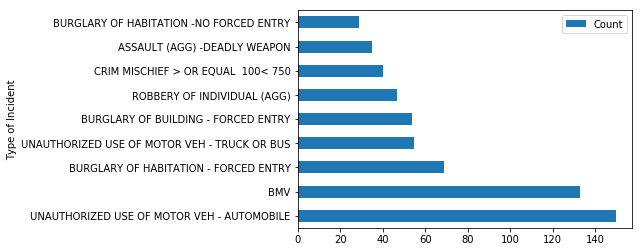

In [10]:
type_of_incident = pd.DataFrame({'Type of Incident':['UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE', 'BMV', 'BURGLARY OF HABITATION - FORCED ENTRY', 'UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS', 'BURGLARY OF BUILDING - FORCED ENTRY', 'ROBBERY OF INDIVIDUAL (AGG)', 'CRIM MISCHIEF > OR EQUAL  100< 750', 'ASSAULT (AGG) -DEADLY WEAPON', 'BURGLARY OF HABITATION -NO FORCED ENTRY'], 'Count':[150, 133, 69, 55, 54, 47, 40, 35, 29]})
ax = type_of_incident.plot.barh(x='Type of Incident', y='Count')

In [46]:
bmvcrime = dallas_crime.loc[dallas_crime['Type of Incident'] == 'BMV']
bmvcrime[['Division', 'Type of Incident', 'Zip Code', 'X Coordinate', 'Y Coordinate']]

,Division,Type of Incident,Zip Code,X Coordinate,Y Coordinate
5,CENTRAL,BMV,75226,2.496649e+06,6.971339e+06
16,NORTHWEST,BMV,75220,2.469779e+06,7.000522e+06
19,CENTRAL,BMV,75202,2.489270e+06,6.971396e+06
29,CENTRAL,BMV,75204,2.490252e+06,6.978153e+06
44,SOUTHEAST,BMV,75227,2.530267e+06,6.962407e+06
58,SOUTHEAST,BMV,75227,2.523867e+06,6.975318e+06
75,SOUTHWEST,BMV,75207,2.486053e+06,6.969538e+06
78,NORTHEAST,BMV,75228,2.525363e+06,6.987369e+06
81,SOUTHEAST,BMV,75227,2.537215e+06,6.966960e+06
86,CENTRAL,BMV,75204,2.494978e+06,6.973862e+06


In [47]:
bmvcrime_data = bmvcrime.groupby(['Division']).size().to_frame(name='Count').reset_index()
bmvcrime_data

,Division,Count
0,CENTRAL,37
1,NORTH CENTRAL,14
2,NORTHEAST,16
3,NORTHWEST,24
4,SOUTH CENTRAL,8
5,SOUTHEAST,16
6,SOUTHWEST,18


### Based on our generic understanding, the number of crimes are more during late nights It is clearly evident that the number of Police Incidents are directly proportional accordingly i.e., "Watch = 1"

In [9]:
watch_count = dallas_crime.groupby(['Watch']).size().to_frame(name='Count').reset_index()
watch_count

,Watch,Count
0,1,433
1,2,257
2,3,310


### Does Gender play a key role in narrowing down our victims in Dallas?

In [15]:
victim_gender = dallas_crime.groupby(['Victim Gender']).size().to_frame(name='Count').reset_index()
victim_gender

,Victim Gender,Count
0,Female,319
1,Male,374
2,Unknown,1


In [35]:
address = 'Dallas, Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dallas, Texas is {}, {}.'.format(latitude, longitude))

NameError: name 'Nominatim' is not defined